<a href="https://colab.research.google.com/github/shannu1063/ml/blob/main/kothapalli_shanmukh_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [4]:
import re
from collections import defaultdict
from typing import List, Dict, Set
import pandas as pd

class MLAbstractAnalyzer:
    def __init__(self, abstracts: List[str]):
        self.abstracts = [self.preprocess_text(abstract) for abstract in abstracts if isinstance(abstract, str)]

    def preprocess_text(self, text: str) -> str:
        """Cleaning and preprocessing the text"""
        text = text.lower()
        text = re.sub(r'http\S+|www\.\S+', '', text)
        text = re.sub(r'[^a-z\s\-]', '', text)
        text = ' '.join(text.split())
        return text

    def get_ngrams(self, text: str, n: int) -> List[str]:
        """Generating n-grams from the text"""
        words = text.split()
        return [' '.join(words[i:i + n]) for i in range(len(words) - n + 1)]

    def count_trigrams(self) -> pd.DataFrame:
        """Counting frequency of all trigrams and return it as DataFrame"""
        trigram_counts = defaultdict(int)
        for abstract in self.abstracts:
            trigrams = self.get_ngrams(abstract, 3)
            for trigram in trigrams:
                trigram_counts[trigram] += 1

        # Converting to DataFrame and sorting by frequency
        df = pd.DataFrame(list(trigram_counts.items()), columns=['Trigram', 'Frequency'])
        return df.sort_values('Frequency', ascending=False).reset_index(drop=True)

    def count_unigrams(self) -> Dict[str, int]:
        """Counting frequency of all unigrams"""
        unigram_counts = defaultdict(int)
        for abstract in self.abstracts:
            words = abstract.split()
            for word in words:
                unigram_counts[word] += 1
        return dict(unigram_counts)

    def count_bigrams(self) -> Dict[str, int]:
        """Counting frequency of all bigrams"""
        bigram_counts = defaultdict(int)
        for abstract in self.abstracts:
            bigrams = self.get_ngrams(abstract, 2)
            for bigram in bigrams:
                bigram_counts[bigram] += 1
        return dict(bigram_counts)

    def calculate_bigram_probabilities(self) -> pd.DataFrame:
        """Calculating probabilities for all bigrams and returning as DataFrame"""
        bigram_counts = self.count_bigrams()
        unigram_counts = self.count_unigrams()
        probabilities = {}

        for bigram, count in bigram_counts.items():
            w1, w2 = bigram.split()
            if w1 in unigram_counts and unigram_counts[w1] > 0:
                probabilities[bigram] = count / unigram_counts[w1]

        # Converting to DataFrame and sorting by probability
        df = pd.DataFrame(list(probabilities.items()),
                         columns=['Bigram', 'Probability'])
        return df.sort_values('Probability', ascending=False).reset_index(drop=True)

    def extract_noun_phrases(self) -> Set[str]:
        """Extracting ML-specific noun phrases using patterns"""
        noun_phrases = set()
        patterns = [
            r'\b(?:machine|deep|supervised|unsupervised)\s+learning\b',
            r'\b(?:neural|convolutional|recurrent)\s+networks?\b',
            r'\b(?:artificial|general)\s+intelligence\b',
            r'\b(?:training|inference|prediction)\s+(?:algorithm|model|system)s?\b',
            r'\b(?:data|graph|network)\s+(?:analysis|processing|structure)s?\b',
            r'\b(?:large|small)\s+scale\s+(?:system|model|dataset)s?\b',
            r'\b(?:computational|processing)\s+(?:device|unit|system)s?\b',
            r'\b(?:deep|machine)\s+learning\s+(?:algorithm|model|system)s?\b',
            r'\b(?:state|art)\s+(?:method|algorithm|model|system)s?\b',
            r'\b(?:data|model|system)\s+(?:intensive|based|driven)\b'
        ]

        for abstract in self.abstracts:
            for pattern in patterns:
                matches = re.finditer(pattern, abstract)
                for match in matches:
                    noun_phrases.add(match.group().lower())

        return noun_phrases

    def calculate_noun_phrase_probabilities(self) -> pd.DataFrame:
        """Calculating relative probabilities of noun phrases for each and every abstract"""
        noun_phrases = self.extract_noun_phrases()
        probabilities_dict = defaultdict(list)

        for phrase in noun_phrases:
            max_freq = 0
            frequencies = []

            for abstract in self.abstracts:
                freq = len(re.findall(rf'\b{re.escape(phrase)}\b', abstract.lower()))
                frequencies.append(freq)
                max_freq = max(max_freq, freq)

            max_freq = max_freq if max_freq > 0 else 1
            relative_probs = [freq/max_freq for freq in frequencies]
            probabilities_dict[phrase] = relative_probs

        return pd.DataFrame(probabilities_dict,
                          index=[f"Abstract_{i+1}" for i in range(len(self.abstracts))])

    def print_analysis_results(self):
        """Printing all analysis results"""

        pd.set_option('display.max_rows', None)
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)


        print("\n=== ALL TRIGRAM FREQUENCIES ===")
        trigrams_df = self.count_trigrams()
        print(trigrams_df.to_string(index=False))

        print("\n=== ALL BIGRAM PROBABILITIES ===")
        bigrams_df = self.calculate_bigram_probabilities()
        print(bigrams_df.to_string(index=False))


        print("\n=== NOUN PHRASE RELATIVE PROBABILITIES (ALL ABSTRACTS) ===")
        np_probs_df = self.calculate_noun_phrase_probabilities()
        print(np_probs_df.round(3).to_string())


if __name__ == "__main__":

    data = pd.read_csv("cleaned_machine_learning_abstracts.csv")


    abstracts = data['cleaned_abstract'].dropna().tolist()


    analyzer = MLAbstractAnalyzer(abstracts)


    analyzer.print_analysis_results()


=== ALL TRIGRAM FREQUENCIES ===
                                 Trigram  Frequency
                             can be used          2
                              and it has          2
             machine learning algorithms          2
                         to address them          2
                        for each dataset          2
                           this paper we          2
                 learning algorithms and          2
                           in this paper          2
                   and an implementation          2
                          in addition to          2
                  training and inference          2
                           in ai systems          2
                              bias in ai          2
                    computer science and          2
                          set has images          2
                     of computer science          2
                       as an open-source          2
              of artificial int

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [5]:
import csv

class Document:
    def __init__(self, title, abstract, year):
        self.title = title
        self.abstract = abstract
        self.year = year

def preprocess_text(text):
    """Converting text to lowercase and split into words without using built-in functions"""
    # Converting to lowercase manually
    lowercase_text = ""
    for char in text:
        if 'A' <= char <= 'Z':
            # Converting uppercase to lowercase using ASCII offset
            lowercase_text += chr(ord(char) + 32)
        else:
            lowercase_text += char

    # Removing special characters and split into words
    words = []
    current_word = ""

    for char in lowercase_text:
        if 'a' <= char <= 'z' or char == ' ':
            if char == ' ':
                if current_word:
                    words.append(current_word)
                    current_word = ""
            else:
                current_word += char

    if current_word:
        words.append(current_word)

    return words

def compute_term_frequency(words):
    """Computing term frequencies without using Counter"""
    word_counts = {}
    total_words = 0

    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
        total_words += 1

    term_frequencies = {}
    for word, count in word_counts.items():
        term_frequencies[word] = count / total_words

    return term_frequencies

def create_vocabulary(documents):
    """Creating vocabulary from all documents"""
    vocabulary = {}
    vocab_index = 0

    for doc in documents:
        words = preprocess_text(doc.abstract)
        for word in words:
            if word not in vocabulary:
                vocabulary[word] = vocab_index
                vocab_index += 1

    return vocabulary

def compute_document_frequency(documents, vocabulary):
    """Computing document frequency for each term"""
    doc_freq = {}

    for word in vocabulary:
        doc_freq[word] = 0

    for doc in documents:
        words_seen = {}
        words = preprocess_text(doc.abstract)

        for word in words:
            if word not in words_seen:
                words_seen[word] = True
                if word in doc_freq:
                    doc_freq[word] += 1

    return doc_freq

def compute_idf(doc_freq, total_docs):
    """Computing inverse document frequency"""
    idf_scores = {}

    for word, freq in doc_freq.items():
        n_div_df = total_docs / (freq + 1)  # Add 1 to avoid division by zero as it can lead to error


        ln_val = 0
        x = (n_div_df - 1) / (n_div_df + 1)
        power = x
        for i in range(1, 10, 2):
            ln_val += power / i
            power *= x * x
        ln_val *= 2

        idf_scores[word] = ln_val + 1  # Add 1 to avoid negative values

    return idf_scores

def compute_magnitude(vector):
    """Compute vector magnitude without using math.sqrt"""
    sum_squares = 0
    for value in vector:
        sum_squares += value * value

    # Manual square root using Newton's method
    if sum_squares == 0:
        return 0

    x = sum_squares
    for _ in range(10):  # 10 iterations so that a good approximation is there
        x = 0.5 * (x + sum_squares / x)

    return x

def compute_tfidf_vectors(documents, vocabulary, idf_scores):
    """Computing TF-IDF vectors for all documents"""
    tfidf_vectors = []

    for doc in documents:
        vector = [0.0] * len(vocabulary)
        words = preprocess_text(doc.abstract)
        tf_scores = compute_term_frequency(words)

        for word, tf in tf_scores.items():
            if word in vocabulary:
                vector[vocabulary[word]] = tf * idf_scores[word]

        tfidf_vectors.append(vector)

    return tfidf_vectors

def cosine_similarity(vec1, vec2):
    """Computing cosine similarity between two vectors"""
    if len(vec1) != len(vec2):
        return 0

    dot_product = 0
    for i in range(len(vec1)):
        dot_product += vec1[i] * vec2[i]

    mag1 = compute_magnitude(vec1)
    mag2 = compute_magnitude(vec2)

    if mag1 == 0 or mag2 == 0:
        return 0

    return dot_product / (mag1 * mag2)

def search_documents(query, documents, vocabulary, tfidf_vectors, idf_scores):
    """Searching documents using cosine similarity"""
    query_words = preprocess_text(query)
    query_tf = compute_term_frequency(query_words)

    query_vector = [0.0] * len(vocabulary)
    for word, tf in query_tf.items():
        if word in vocabulary:
            query_vector[vocabulary[word]] = tf * idf_scores.get(word, 0)

    results = []
    for idx, doc_vector in enumerate(tfidf_vectors):
        similarity = cosine_similarity(query_vector, doc_vector)
        results.append((idx, similarity))

    results.sort(key=lambda x: x[1], reverse=True)
    return results

def read_documents_from_csv(file_path):
    """Reading documents from a CSV file"""
    documents = []

    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            csv_reader = csv.DictReader(file)
            for row in csv_reader:

                title = row.get('title', '').strip()
                abstract = row.get('abstract', '').strip()
                year = row.get('year', '').strip()

                if abstract:
                    documents.append(Document(title, abstract, year))
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")

    return documents

def main(csv_file_path, query):
    """Main execution function"""

    documents = read_documents_from_csv(csv_file_path)

    if not documents:
        print("No documents found or error reading file.")
        return


    vocabulary = create_vocabulary(documents)
    doc_freq = compute_document_frequency(documents, vocabulary)
    idf_scores = compute_idf(doc_freq, len(documents))

    # Computing TF-IDF vectors for all documents
    tfidf_vectors = compute_tfidf_vectors(documents, vocabulary, idf_scores)

    # Searching documents
    results = search_documents(query, documents, vocabulary, tfidf_vectors, idf_scores)

    print(f"\nSearch results for query: '{query}'\n")
    print("Rank | Similarity Score | Year | Title")
    print("-" * 80)

    for rank, (doc_idx, similarity) in enumerate(results, 1):
        doc = documents[doc_idx]
        print(f"{rank:2d}.   {similarity:.4f}          {doc.year:4s}  {doc.title}")
        print(f"      Excerpt: {doc.abstract[:150]}...\n")

if __name__ == "__main__":

    csv_file_path = "cleaned_machine_learning_abstracts.csv"
    query = "machine learning applications in weather forecasting" #based on my dataset
    main(csv_file_path, query)


Search results for query: 'machine learning applications in weather forecasting'

Rank | Similarity Score | Year | Title
--------------------------------------------------------------------------------
 1.   0.1858          2015  Convolutional LSTM Network: A Machine Learning Approach for Precipitation Nowcasting
      Excerpt: The goal of precipitation nowcasting is to predict the future rainfall intensity in a local region over a relatively short period of time. Very few pr...

 2.   0.1772          2019  A Survey on Bias and Fairness in Machine Learning
      Excerpt: With the widespread use of artificial intelligence (AI) systems and applications in our everyday lives, accounting for fairness has gained significant...

 3.   0.1281          2016  TensorFlow: A system for large-scale machine learning
      Excerpt: TensorFlow is a machine learning system that operates at large scale and in heterogeneous environments. Tensor-Flow uses dataflow graphs to represent ...

 4.   0.0642  

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Preprocessing text...
Training Word2Vec model...
Model saved as 'ml_abstracts_word2vec.model'

Some word similarities:
Words most similar to 'learning':
[('to', 0.5487996935844421), ('and', 0.5295740962028503), ('the', 0.5206261873245239), ('scale', 0.5190269351005554), ('of', 0.5144378542900085), ('for', 0.5141389966011047), ('in', 0.5112949013710022), ('open', 0.4294453561306), ('state', 0.4274635910987854), ('under', 0.42410212755203247)]

Words most similar to 'neural':
[('and', 0.3740967810153961), ('under', 0.3491940498352051), ('the', 0.32860711216926575), ('in', 0.32503950595855713), ('of', 0.3195578455924988), ('decisions', 0.31682848930358887), ('scale', 0.3164215385913849), ('to', 0.3125920295715332), ('been', 0.31213873624801636), ('can', 0.2884923219680786)]

Creating visualization...
Visualization saved as 'word_embeddings_visualization.png'


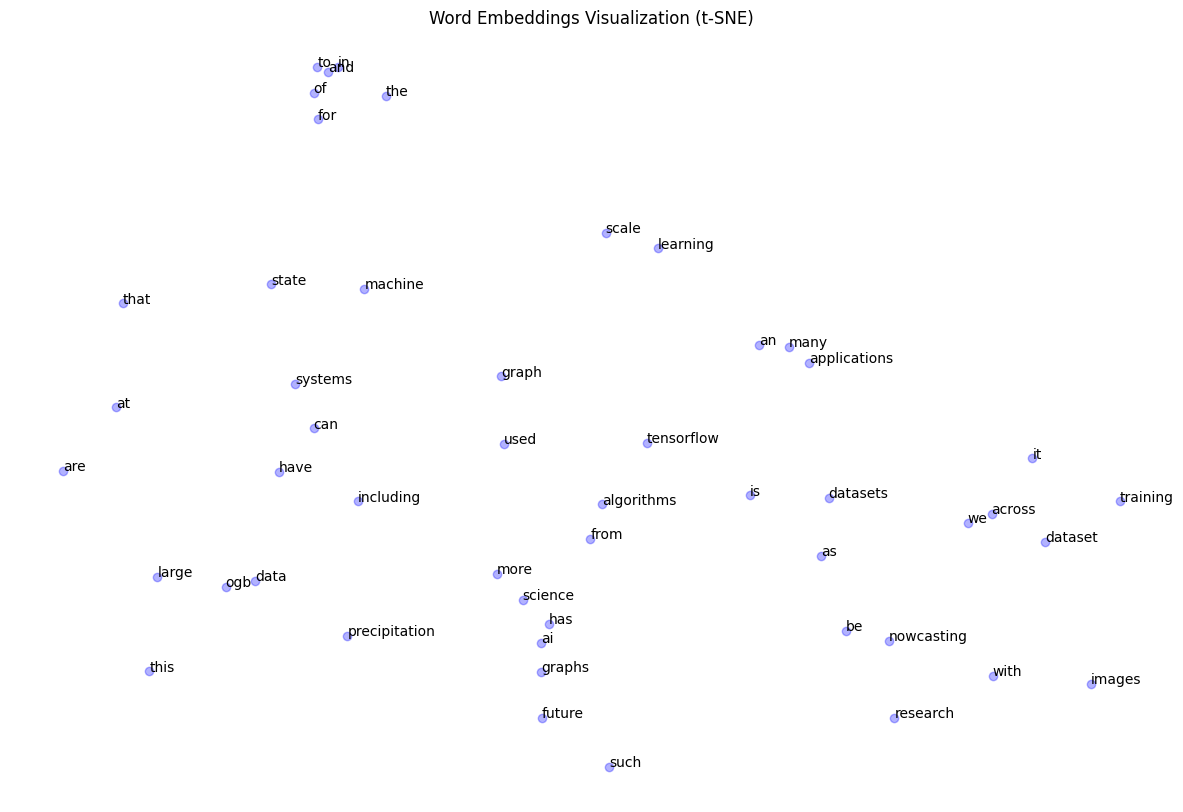

In [3]:
# Write your code here
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Loading and preprocess the data
def preprocess_text(df):
    # Combining all abstracts into a list of sentences
    all_text = df['cleaned_abstract'].dropna().str.cat(sep=' ')
    # Spliting into sentences
    sentences = sent_tokenize(all_text)
    # Tokenizing each sentence into words
    tokenized_sentences = [simple_preprocess(sentence, deacc=True) for sentence in sentences]
    return tokenized_sentences

# Training Word2Vec model
def train_word2vec(sentences, vector_size=300, window=5, min_count=2):
    model = Word2Vec(sentences=sentences,
                    vector_size=vector_size,
                    window=window,
                    min_count=min_count,
                    workers=4,
                    sg=1)
    return model

# Visualizing embeddings
def visualize_embeddings(model, num_words=50):
    # Getting most common words
    words = [word for word, vocab in model.wv.key_to_index.items()][:num_words]
    word_vectors = np.array([model.wv[word] for word in words])

    # Reducing dimensionality with t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    reduced_vectors = tsne.fit_transform(word_vectors)

    # Plotting
    plt.figure(figsize=(15, 10))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='blue', alpha=0.3)

    # Adding word labels
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.title("Word Embeddings Visualization (t-SNE)")
    plt.axis('off')
    return plt

def main():
    df = pd.read_csv('cleaned_machine_learning_abstracts.csv')

    print("Preprocessing text...")
    sentences = preprocess_text(df)

    print("Training Word2Vec model...")
    model = train_word2vec(sentences)

    model.save("ml_abstracts_word2vec.model")
    print("Model saved as 'ml_abstracts_word2vec.model'")


    print("\nSome word similarities:")
    try:
        print("Words most similar to 'learning':")
        print(model.wv.most_similar('learning'))
        print("\nWords most similar to 'neural':")
        print(model.wv.most_similar('neural'))
    except KeyError as e:
        print(f"Word not found in vocabulary: {e}")

    print("\nCreating visualization...")
    plt = visualize_embeddings(model)
    plt.savefig('word_embeddings_visualization.png')
    print("Visualization saved as 'word_embeddings_visualization.png'")

    return model

if __name__ == "__main__":
    model = main()






## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [1]:
# The GitHub link of your final csv file

# Link:https://github.com/shannu1063/ml/blob/main/ml_abstracts_sentiment%20(1).csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [2]:
# Type your answer
"""The word embeddings implementation needed careful consideration of academic language patterns as well as dataset size issues for optimal results.
Creating a sentiment analysis dataset was challenging, as it required reimagining since my dataset is technical oriented one instead of traditional sentiment analysis so that i can develop approprite criteria.
The provided time can be increased doe to the challenging nature of the assignment."""

'The word embeddings implementation needed careful consideration of academic language patterns as well as dataset size issues for optimal results.\nCreating a sentiment analysis dataset was challenging, as it required reimagining since my dataset is technical oriented one instead of traditional sentiment analysis so that i can develop approprite criteria.\nThe provided time can be increased doe to the challenging nature of the assignment.'